In [1]:
import gpflow

/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
print np.log(3.5)

1.252762968495368


In [7]:
mu = gpflow.priors.Gaussian(0, 0.25)
A = gpflow.priors.Gaussian(6, 2)

In [8]:
mu_vec = np.array([])
A_vec = np.array([])
for i in xrange(1000):
    mu.randomize()
    A.randomize()
    mur = mu.sample()
    Ar = A.sample()
    mu_vec = np.append(mu_vec, mur)
    A_vec = np.append(A_vec, Ar)    

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline

Text(0.5,1,u'A')

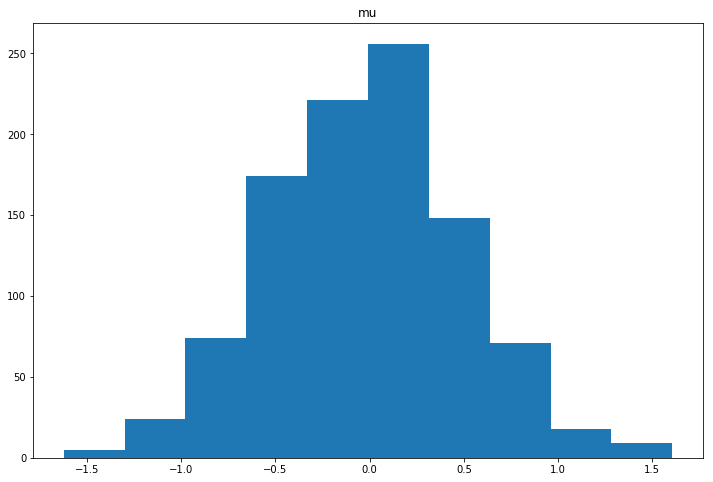

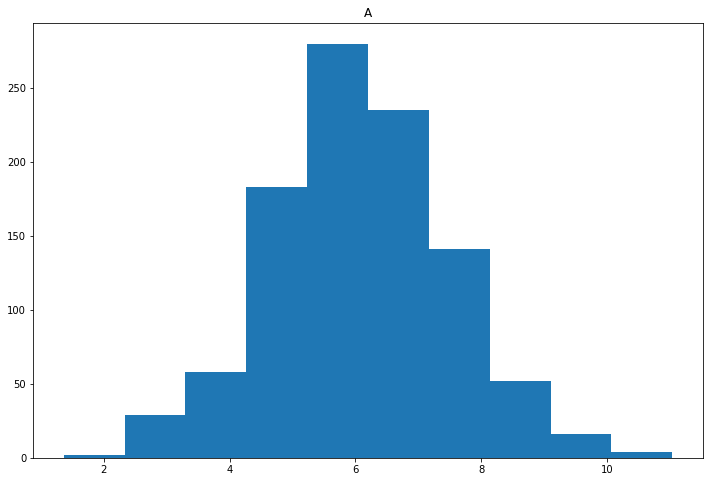

In [10]:
plt.figure(figsize= (12,8))
plt.hist(mu_vec)
plt.title('mu')
plt.figure(figsize= (12,8))
plt.hist(A_vec)
plt.title('A')

# GP Priors

In [11]:
from gpflow.param import Param, DataHolder

In [12]:
import sys
sys.path.append('../')
from SynOccupant import datagen

In [13]:
config_file = '../config_files/thermal_config.json'

In [14]:
x = np.linspace(20,27, 100)
DG = datagen.ThermalPrefDataGen(config_file)

In [15]:
xnorm = DG.normalize1D(x)

In [16]:
X = DataHolder(xnorm)

In [17]:
from GPPref import mean_func

In [44]:
GaussMean = mean_func.Parabola(mu = 0., A = 6.)

In [45]:
GaussMean.mu.prior = mu
#GaussMean.mu = 0.2
#GaussMean.mu.fixed = True
GaussMean.A.prior = A
#GaussMean.A = 6
#GaussMean.A.fixed = True

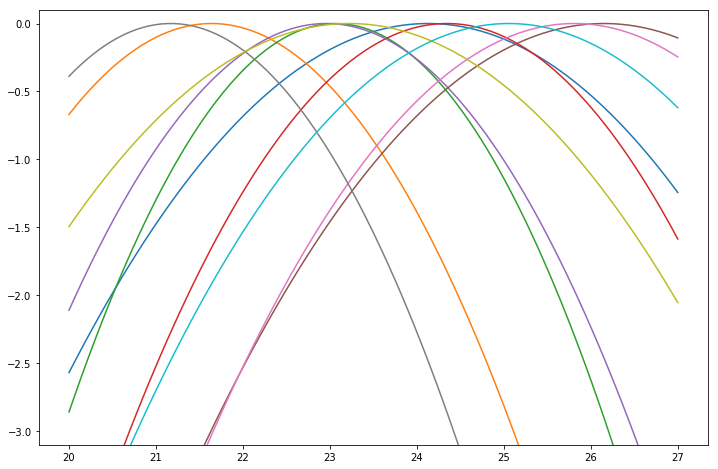

In [54]:
plt.figure(figsize= (12,8))
a = 100
num_samples = 10
GP = np.zeros(shape = (num_samples, xnorm.shape[0]))
for i in xrange(a, a + num_samples):
    GaussMean.randomize()
    g = GaussMean.compute_mean(xnorm[:,None])
    plt.plot(x, g)
    plt.ylim(-3.1,0.1)
    #GP[i,:] = g[:,0]

In [34]:
GaussMean

Name,values,prior,constraint
unnamed.A,[3.],"N([6.],[2.])",[FIXED]
unnamed.mu,[1.],"N([0.],[0.25])",[FIXED]


In [35]:
a = gpflow.priors.Gaussian(23,1)